# Sentiment Analysis of Consumer Reviews on Natural Mouthwashes

**Introduction and Overview**

The project focuses on analyzing reviews about natural mouthwash ingredients to determine their inclusion or exclusion in natural mouthwash products. It aims to explore and identify specific ingredients based on sentiment analysis extracted from consumer feedback.

In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
from transformers import pipeline
import spacy

plt.style.use('ggplot')

import nltk
warnings.filterwarnings("ignore", message="Some weights of the PyTorch model were not used")

2024-01-15 19:50:29.832348: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Loading the data

df = pd.read_excel('Natural_Mouthwashes_copy copy.xlsx',header = 4,sheet_name='Consumer Quotes')
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop=True)

In [14]:
df

,Quote
0,This stuff is dye free and I like that it used...
1,If the description of the product had listed p...
2,I love this fluoride free mouthwash!
3,I dont know how the combination of ingredients...
4,So I needed something to combat the acid in my...
...,...
597,My gums were pretty sensitive (mild bleeding w...
598,This product is filled with really good ingred...
599,Plus it’s made from All natural ingredients (N...
600,You can feel in working as there's a tingling ...


### Using Amazon review sentiment analysis from Liyuan

**Sentiment Analysis Model Explanation:**

The sentiment analysis for this project harnesses a pre-trained transformer-based model specifically designed for sequence classification tasks. In this instance, the model utilized is "LiYuan/amazon-review-sentiment-analysis," chosen for its adeptness in discerning sentiment from textual data.

Steps to Implement the Sentiment Analysis Model:
1. Model Loading:
The project begins by loading the pre-trained sentiment analysis model using the AutoTokenizer and TFAutoModelForSequenceClassification classes from the transformers library.


In [3]:
#Load the model
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

import tensorflow as tf
tokenizer = AutoTokenizer.from_pretrained("LiYuan/amazon-review-sentiment-analysis")
model = TFAutoModelForSequenceClassification.from_pretrained("LiYuan/amazon-review-sentiment-analysis", from_pt=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


2. Tokenization and Preprocessing:

The consumer quotes related to natural mouthwashes are tokenized using the tokenizer instantiated from the pre-trained model. This step prepares the textual data for sentiment analysis.

In [17]:
# Tokenize the text in the DataFrame
tokenized_data = tokenizer(df['Quote'].tolist(), return_tensors='tf', padding=True, truncation=True)

3. Sentiment Extraction:

A forward pass is performed through the loaded model using the tokenized data to obtain sentiment predictions.

In [ ]:
# Forward pass through the model
outputs = model(**tokenized_data)

# Get the predicted class
predictions = tf.argmax(outputs.logits, axis=1)

# Add the predictions to the DataFrame
df['sentiment_prediction'] = predictions.numpy()

In [18]:
df

,Quote,sentiment_prediction
0,This stuff is dye free and I like that it used...,4
1,If the description of the product had listed p...,0
2,I love this fluoride free mouthwash!,4
3,I dont know how the combination of ingredients...,4
4,So I needed something to combat the acid in my...,4
...,...,...
597,My gums were pretty sensitive (mild bleeding w...,2
598,This product is filled with really good ingred...,4
599,Plus it’s made from All natural ingredients (N...,4
600,You can feel in working as there's a tingling ...,4


In [5]:
ingredients = [
    'Tea Tree Oil', 'Aloe Vera','Eucalyptol', 'Alcohol', 'Chlorine Dioxide', 'Chlorhexidine','Cocamidopropyl Betaine', 'Parabens','Poloxamer 407', 'Formaldehyde', 
    'Saccharin', 'Fluoride', 'SLS', 'Sodium Saccharin', 'CPC',
    'Cetylpyridinium chloride', 'Triclosan',
    'Menthol', 'Eucalyptol', 'Thymol', 'Peppermint oil', 'Spearmint oil', 'Artificial flavors',
    'Water', 'Glycerin', 'Propylene glycol', 'Sorbitol',
    'Ethanol', 'salicylate',
    'Polysorbate 80', 'Sodium lauryl sulfate', 'Cetylpyridinium chloride',
    'Methylparaben', 'Ethylparaben', 'Sodium benzoate',
    'FD&C Blue No. 1', 'FD&C Red No. 40',
    'Citric acid', 'Sodium citrate', 'Phosphoric acid','Peroxide',
    'Sesame oil', 'oregano oil', 'gum arabic', 
    'hydrogen peroxide', 'essential oils','cinnamon leaf oil', 'peppermint oil',
    'rosemary leaf oil ', 'eucalyptus leaf oil', 'lemon peel oil', 'clove bud oil', 
    'coconut oil', 
    'mint','cinnamon','colloidal silver', 'hemp seed oil',
    'xylitol', 
    'neem oil',
    'Stevia', 
    'Salt', 
    'Clove',
    'Clove oil', 'Cinnamon oil',
    'Chamomile', 'Sage', 'Peppermint extract',
    'Natural mint flavor', 'Lemon extract', 'water',
    'Xylitol', 'Salt', 'Peppermint', 'essential oils',
    'Neem', 'Myrrh', 'Licorice root extract', 'Aloe', 'Clove',
    'Calcium carbonate', 'Sodium bicarbonate', 'Baking soda', 'Apple cider vinegar', 
    'cetylpyridinium chloride',
    'zinc lactate',
    'potassium sorbate',
    'lactic acid',
    'rebaudioside A',
    'xanthan gum',
    'silica'
]

ingredients_lower = [ingredient.lower() for ingredient in ingredients]


In [6]:
# Function to check for ingredients in each row
def find_ingredients(row):
    found_ingredients = []
    for ingredient in ingredients_lower:
        if ingredient in row:
            found_ingredients.append(ingredient)
            print(ingredient)
    return ', '.join(found_ingredients)

# Apply the function to each row to find ingredients and create a new column
df['Found_Ingredients'] = df['Quote'].apply(find_ingredients)

alcohol
fluoride
alcohol
mint
alcohol
alcohol
alcohol
cinnamon
mint
mint
alcohol
alcohol
fluoride
alcohol
mint
alcohol
fluoride
alcohol
alcohol
alcohol
alcohol
alcohol
alcohol
water
water
mint
alcohol
alcohol
alcohol
alcohol
alcohol
alcohol
alcohol
alcohol
mint
cinnamon
mint
alcohol
fluoride
salt
salt
alcohol
mint
alcohol
alcohol
alcohol
alcohol
mint
alcohol
alcohol
fluoride
mint
alcohol
alcohol
alcohol
alcohol
alcohol
mint
cinnamon
xylitol
stevia
xylitol
alcohol
alcohol
alcohol
essential oils
mint
cinnamon
clove
peppermint
essential oils
clove
peroxide
alcohol
peroxide
hydrogen peroxide
alcohol
fluoride
glycerin
mint
cinnamon
clove
peppermint
clove
alcohol
peroxide
hydrogen peroxide
alcohol
peroxide
hydrogen peroxide
peroxide
hydrogen peroxide
alcohol
fluoride
peppermint oil
water
glycerin
sodium lauryl sulfate
peroxide
gum arabic
hydrogen peroxide
cinnamon leaf oil
peppermint oil
rosemary leaf oil 
eucalyptus leaf oil
lemon peel oil
clove bud oil
mint
cinnamon
clove
water
peppermint


In [43]:
#Dropping rows with missing values on Found_Ingredients column
df['Found_Ingredients'].replace('', np.nan, inplace=True)


In [46]:
df.dropna(subset=['Found_Ingredients'], inplace=True)

,Quote,sentiment_prediction,Found_Ingredients
0,This stuff is dye free and I like that it used...,4,alcohol
2,I love this fluoride free mouthwash!,4,fluoride
5,"It’s a premium product, so one to consider if ...",4,alcohol
6,"This mouthwash tastes very pleasant, with a mi...",4,mint
7,Burns more than regular mouthwash with alcohol.,0,alcohol
...,...,...,...
591,This doesn't contain alcohol but it still burn...,2,alcohol
595,"It is paraben free, triclosan free, gluten fr...",4,"triclosan, artificial flavors"
597,My gums were pretty sensitive (mild bleeding w...,2,alcohol
599,Plus it’s made from All natural ingredients (N...,4,"coconut oil, mint, hemp seed oil"


In [47]:
df.reset_index(inplace=True,drop=True)

## Ingredient Ranking by Sentiment and Popularity
This part analyzes my dataframe to rank ingredients based on their average sentiment scores and frequency of mentions. 

It calculates sentiment scores and ingredient frequency, then combines and sorts the data to provide a top 10 list. 

The result helps prioritize ingredients by considering both sentiment and popularity in the dataset.

In [174]:
# Calculate the average sentiment score for each ingredient
ingredient_sentiment = df.explode('Found_Ingredients').groupby('Found_Ingredients')['sentiment_prediction'].mean().reset_index()

# Count the frequency of each ingredient mentioned
ingredient_frequency = df.explode('Found_Ingredients')['Found_Ingredients'].value_counts().reset_index()
ingredient_frequency.columns = ['Found_Ingredients', 'Frequency']

# Merge sentiment and frequency data
ingredient_info = pd.merge(ingredient_sentiment, ingredient_frequency, on='Found_Ingredients')

# Sort by sentiment score or frequency to prioritize ingredients
sorted_ingredients = ingredient_info.sort_values(by=['Frequency'], ascending=[False])


# Filtering to exclude rows where 'Found_Ingredients' is an empty string
sorted_ingredients = sorted_ingredients[sorted_ingredients['Found_Ingredients'] != '']
# Display the sorted list of ingredients
sorted_ingredients = sorted_ingredients.head(10)

sorted_ingredients

,Found_Ingredients,sentiment_prediction,Frequency
0,alcohol,2.988930,271
21,mint,3.373134,67
3,artificial flavors,3.333333,27
13,fluoride,3.269231,26
42,xylitol,3.000000,22
29,peroxide,3.000000,16
6,clove,4.000000,16
8,coconut oil,3.769231,13
1,aloe,3.500000,12
41,water,3.400000,10


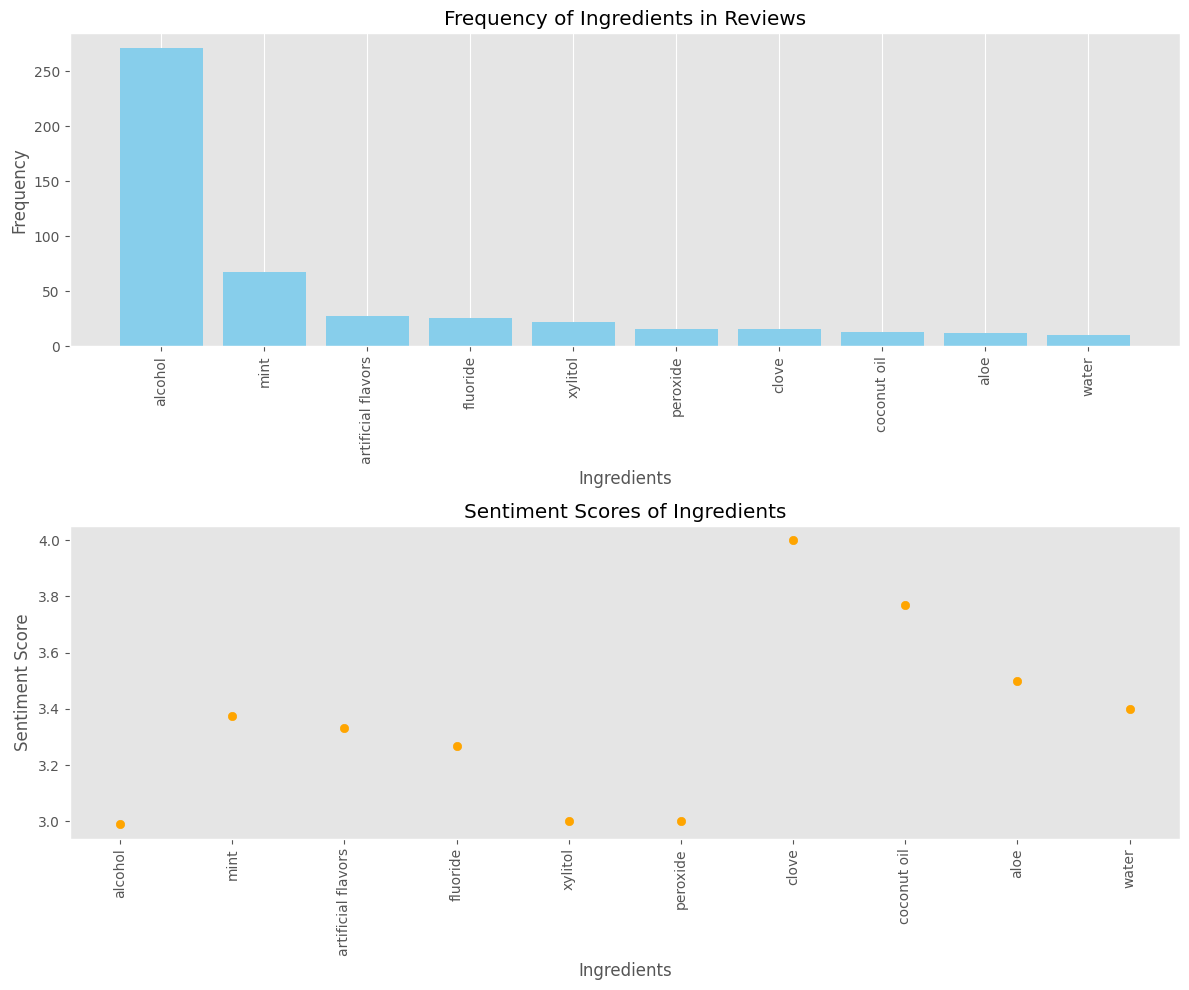

In [175]:
# Create a figure with two subplots: bar plot and scatter plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Bar plot for ingredient frequency
ax1.bar(sorted_ingredients['Found_Ingredients'], sorted_ingredients['Frequency'], color='skyblue')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Ingredients')
ax1.set_title('Frequency of Ingredients in Reviews')
ax1.tick_params(axis='x', rotation=90)
ax1.grid(axis='y')

# Scatter plot for sentiment scores
ax2.scatter(sorted_ingredients['Found_Ingredients'], sorted_ingredients['sentiment_prediction'], color='orange')
ax2.set_ylabel('Sentiment Score')
ax2.set_xlabel('Ingredients')
ax2.set_title('Sentiment Scores of Ingredients')
ax2.tick_params(axis='x', rotation=90)
ax2.grid()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
